In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.12.0


In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

30286/30286 [==============================] - 0s 10us/step


'C:\\Users\\진현킴\\.keras\\datasets\\auto-mpg.data'

In [6]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
dataset = dataset.dropna()

In [8]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

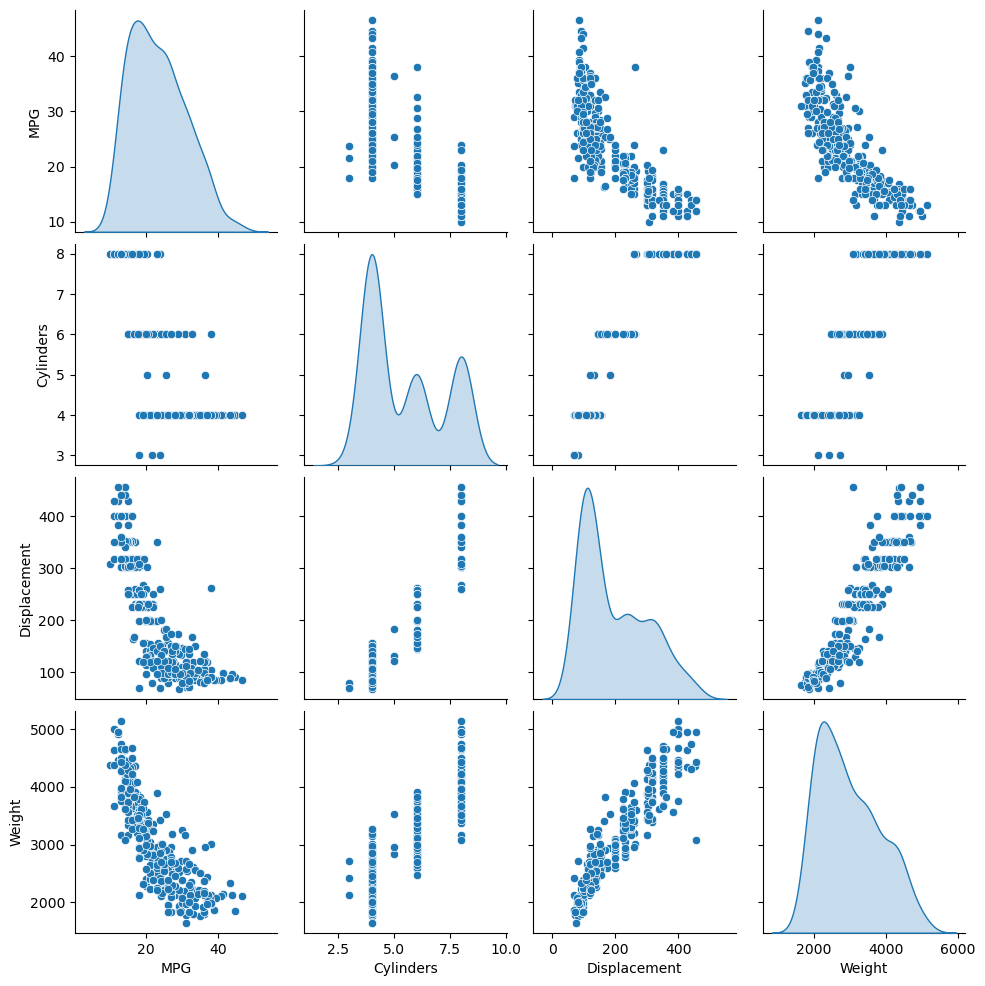

In [10]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

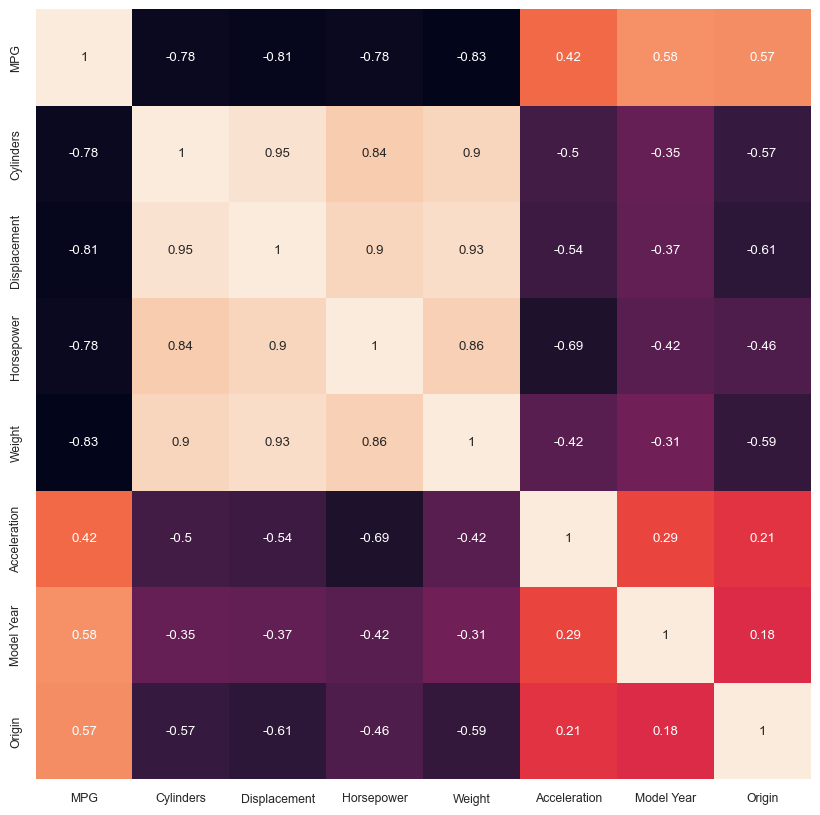

In [11]:
df_corr = dataset.corr()
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [13]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
146,28.0,4,90.0,75.0,2125.0,14.5,74,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,3
...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,3
145,32.0,4,83.0,61.0,2003.0,19.0,74,3


In [16]:
test_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
9,15.0,8,390.0,190.0,3850.0,8.5,70,1
25,10.0,8,360.0,215.0,4615.0,14.0,70,1
28,9.0,8,304.0,193.0,4732.0,18.5,70,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
33,19.0,6,232.0,100.0,2634.0,13.0,71,1
...,...,...,...,...,...,...,...,...
369,34.0,4,112.0,88.0,2395.0,18.0,82,1
375,36.0,4,105.0,74.0,1980.0,15.3,82,2
382,34.0,4,108.0,70.0,2245.0,16.9,82,3
384,32.0,4,91.0,67.0,1965.0,15.7,82,3


In [36]:
X = dataset.drop('MPG',axis=1)
y = dataset['MPG']
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(313, 7) (313,)
(79, 7) (79,)


In [40]:
dt =  DecisionTreeRegressor()
rt = RandomForestRegressor()
lr = LinearRegression()
sv = SVR()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, pred_dt)
print(dt.score(X_train, y_train))

1.0


In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
mse1 = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse1)

평균제곱근오차 4.007761457314317


In [43]:
rt.fit(X_train, y_train)
pred_rt = rt.predict(X_test)
rt_mse = mean_squared_error(y_test, pred_rt)
print(rt.score(X_train, y_train))

0.9845626639043411


In [44]:
mse2 = np.sqrt(mean_squared_error(pred_rt, y_test))
print('평균제곱근오차', mse2)

평균제곱근오차 3.37676113262923


In [45]:
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, pred_lr)
print(lr.score(X_train, y_train))

0.8271220574112093


In [46]:
mse3 = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse3)

평균제곱근오차 3.7621400479117106


In [47]:
sv.fit(X_train, y_train)
pred_sv = sv.predict(X_test)
sv_mse = mean_squared_error(y_test, pred_sv)
print(lr.score(X_train, y_train))

0.8271220574112093


In [48]:
mse4 = np.sqrt(mean_squared_error(pred_sv, y_test))
print('평균제곱근오차', mse4)

평균제곱근오차 5.191072578701958


In [49]:
sv.fit(X_train, y_train)
dt.fit(X_train, y_train)
rt.fit(X_train, y_train)
lr.fit(X_train, y_train)

# 각각의 모델의 성능을 평가합니다.
print("SVR score:", sv.score(X_test, y_test))
print("Decision Tree score:", dt.score(X_test, y_test))
print("Random Forest score:", rt.score(X_test, y_test))
print("Linear Regression score:", lr.score(X_test, y_test))

SVR score: 0.6037816901306219
Decision Tree score: 0.7675192600129191
Random Forest score: 0.830459706431137
Linear Regression score: 0.7918912906118833


In [52]:
# 필요한 라이브러리를 임포트합니다.
from sklearn.preprocessing import PolynomialFeatures

# 2차 다항식을 만들기 위해 PolynomialFeatures를 사용합니다.
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 각각의 모델을 학습시킵니다.
sv.fit(X_train, y_train)
dt.fit(X_train, y_train)
rt.fit(X_train, y_train)
lr.fit(X_train, y_train)

# 각각의 모델의 성능을 평가합니다.
print("SVR score:", sv.score(X_test, y_test))
print("Decision Tree score:", dt.score(X_test, y_test))
print("Random Forest score:", rt.score(X_test, y_test))
print("Linear Regression score:", lr.score(X_test, y_test))

SVR score: 0.7011101531968611
Decision Tree score: 0.8193098303319086
Random Forest score: 0.8886411347678258
Linear Regression score: 0.8602489055522435


In [53]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 10)

In [55]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ridge 모델 학습 및 예측
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso 모델 학습 및 예측
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# MSE 출력
print("Ridge MSE: ", mean_squared_error(y_test, y_pred_ridge))
print("Lasso MSE: ", mean_squared_error(y_test, y_pred_lasso))

Ridge MSE:  7.413032079778464
Lasso MSE:  7.627496410543778


C:\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.49278e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+03, tolerance: 1.975e+00
  model = cd_fast.enet_coordinate_descent(


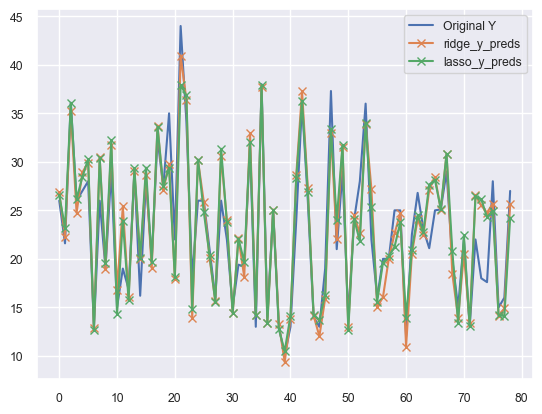

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), y_pred_ridge, '-x', label="ridge_y_preds")
ax.plot(range(len(y_test)), y_pred_lasso, '-x', label="lasso_y_preds")

plt.legend(loc='upper right')
plt.show()